In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM,GRU

In [6]:
df= pd.read_csv("file4.csv",na_values=['null'],index_col='Arrival_Date',parse_dates=True,infer_datetime_format=True)

In [7]:
df

,Max_x0020_Price
Arrival_Date,
2003-11-01,1980
2003-11-03,2500
2003-11-03,2400
2003-11-03,2600
2003-11-04,2400
...,...
2015-03-12,4150
2016-04-24,4500
2016-04-25,4600


In [8]:
split_date = pd.Timestamp('13-02-2012')

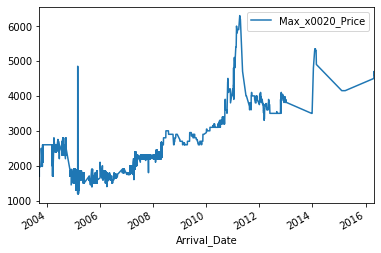

In [9]:
df.plot()

In [10]:
split_date = pd.Timestamp('2012-02-13')

<Figure size 720x432 with 0 Axes>

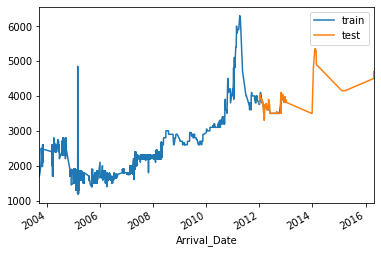

In [11]:
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(10, 6))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [12]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [13]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [14]:
X_train = train[:-1]
y_train = train[1:]

X_test = test[:-1]
y_test = test[1:]

In [11]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
#early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1,shuffle=False)

Epoch 1/100
2261/2261 [==============================] - 2s 770us/step - loss: 533927.3887
Epoch 2/100
2261/2261 [==============================] - 2s 782us/step - loss: 96041.1920
Epoch 3/100
2261/2261 [==============================] - 2s 733us/step - loss: 96035.9291
Epoch 4/100
2261/2261 [==============================] - 2s 737us/step - loss: 96023.3524
Epoch 5/100
2261/2261 [==============================] - 2s 736us/step - loss: 96009.9014
Epoch 6/100
2261/2261 [==============================] - 2s 738us/step - loss: 95996.3773
Epoch 7/100
2261/2261 [==============================] - 2s 797us/step - loss: 95982.8824
Epoch 8/100
2261/2261 [==============================] - 2s 880us/step - loss: 95969.4124
Epoch 9/100
2261/2261 [==============================] - 2s 791us/step - loss: 95955.9835
Epoch 10/100
2261/2261 [==============================] - 2s 792us/step - loss: 95942.5806
Epoch 11/100
2261/2261 [==============================] - 2s 929us/step - loss: 95929.2216
Epoch 1

In [12]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.861
The R2 score on the Test set is:	0.829


In [14]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
#lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
#print('LSTM: %f'%lstm_test_mse)

350/350 [==============================] - 0s 974us/step
NN: 37854.332024


# LSTM

In [59]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

C:\Users\SAHIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\SAHIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
C:\Users\SAHIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\SAHIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [60]:
X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (2261, 1, 1)
Test shape:  (350, 1, 1)


In [61]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
2261/2261 [==============================] - 3s 1ms/step - loss: 0.0414
Epoch 2/100
2261/2261 [==============================] - 3s 1ms/step - loss: 0.0145
Epoch 3/100
2261/2261 [==============================] - 3s 1ms/step - loss: 0.0123
Epoch 4/100
2261/2261 [==============================] - 3s 1ms/step - loss: 0.0119
Epoch 5/100
2261/2261 [==============================] - 4s 2ms/step - loss: 0.0118
Epoch 6/100
2261/2261 [==============================] - 4s 2ms/step - loss: 0.0117
Epoch 7/100
2261/2261 [==============================] - 3s 1ms/step - loss: 0.0117
Epoch 8/100
2261/2261 [==============================] - 3s 1ms/step - loss: 0.0117
Epoch 9/100
2261/2261 [==============================] - 3s 1ms/step - loss: 0.0116
Epoch 10/100
2261/2261 [==============================] - 3s 1ms/step - loss: 0.0116
Epoch 11/100
2261/2261 [==============================] - 3s 1ms/step - loss: 0.0116
Epoch 12/100
2261/2261 [==============================] - 3s 1ms/step - lo

In [62]:
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 8         
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


In [63]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)

In [64]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.679
The R2 score on the Test set is:	0.823


In [65]:
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)

350/350 [==============================] - 0s 594us/step


In [66]:
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

In [67]:
lstm_y_pred_test[2:5]

array([[0.04294673],
       [0.03513591],
       [0.0215053 ]], dtype=float32)

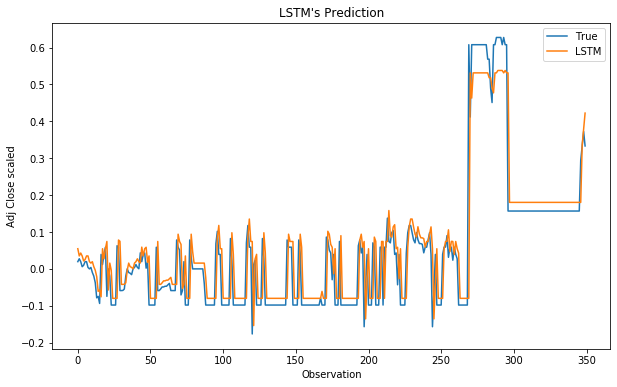

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();